In [1]:
# Installing packages
!pip install vaderSentiment

# Importing necessary packages 

## General libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from re import sub
import time
from datetime import datetime
import os

# NLP libraries
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import spacy

## Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.neural_network  import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest,f_regression, f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer          
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


# Sentiment analysis libraries
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

plt.style.use('ggplot')
pd.set_option("display.max_columns", None)
warnings.filterwarnings('ignore')

In [2]:
def MAE(y_test, y_pred):
    
    return (np.mean(abs(y_test - y_pred)))

In [3]:
def RMSE(y_test, y_pred):
    
    return np.sqrt(np.mean((y_test - y_pred)**2))

## Import data

In [4]:
listings = pd.read_csv("listings.csv", parse_dates = ['host_since','first_review','last_review','last_scraped'])
reviews = pd.read_csv("reviews.csv", parse_dates = ['date'])

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20211006030728,2021-10-06,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,100%,92%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, California, United States",Western Addition,NaN,37.77028,-122.43317,Entire serviced apartment,Entire home/apt,3,NaN,1 bath,1.0,2.0,"[""Keypad"", ""Refrigerator"", ""Wifi"", ""Iron"", ""Di...",$160.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,6,12,18,104,2021-10-06,302,40,5,2014-10-05,2021-09-17,4.87,4.94,4.95,4.96,4.90,4.98,4.78,City Registration Pending,f,1,1,0,0,3.54
1,5858,https://www.airbnb.com/rooms/5858,20211006030728,2021-10-06,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, California, United States",Bernal Heights,NaN,37.74474,-122.42089,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,3.0,"[""Hair dryer"", ""Smoke alarm"", ""Heating"", ""Fire...",$235.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,NaN,t,30,60,90,365,2021-10-06,111,0,0,2009-11-24,2015-08-28,4.88,4.85,4.87,4.89,4.85,4.77,4.68,NaN,f,1,1,0,0,0.77
2,7918,https://www.airbnb.com/rooms/7918,20211006030728,2021-10-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within an hour,100%,100%,f,https://a0.muscache.com/im/users/21994/profile...,https://a0.muscache.com/im/users/21994/profile...,Cole Valley,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"San Francisco, California, United States",Haight Ashbury,NaN,37.76555,-122.45213,Private room in rental uni

In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st..."
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...


## Data cleaning

Drop a few columns

Adding columns of day_of_week, month_of_year and year columns for relevant dates

In [7]:
# 'last_scraped' only has the value '2021-10-06'
# 'scrape_id' only has the value '20211006030728'
# 'listing_url' corresponds to the same url with the listing id
# 'neighbourhood_group_cleansed','bathrooms','calendar_updated' are only NaNs

drops = ['scrape_id',
        'host_name',
        'host_url',
        'host_neighbourhood',
        'listing_url',
        'host_thumbnail_url',
        'host_picture_url',
        'picture_url',
        'neighbourhood',
        'neighbourhood_group_cleansed',
        'bathrooms',
        'calendar_updated',
        'calendar_last_scraped',
        'license',
        #  'id',
         'host_id',
         'host_location',
         'latitude',
         'longitude']

listings = listings.drop(columns = drops)

In [8]:
#Add column for day of the week of dates as 0-6
#Add column for month of the year 
#Add column for year 
#host since 
listings['weekday_host_since'] = listings['host_since'].apply(lambda x: x.weekday()) # Monday -> 0 
listings['month_host_since'] = listings['host_since'].apply(lambda x: x.month)
listings['year_host_since'] = listings['host_since'].apply(lambda x: x.year)
#first review
listings['weekday_first_review'] = listings['first_review'].apply(lambda x: x.weekday()) # Monday -> 0 
listings['month_first_review'] = listings['first_review'].apply(lambda x: x.month)
listings['year_first_review'] = listings['first_review'].apply(lambda x: x.year)
#last review 
listings['weekday_last_review'] = listings['last_review'].apply(lambda x: x.weekday()) # Monday -> 0 
listings['month_last_review'] = listings['last_review'].apply(lambda x: x.month)
listings['year_last_review'] = listings['last_review'].apply(lambda x: x.year)
#last scraped
listings['year_last_scraped'] = listings['last_scraped'].apply(lambda x: x.year)

In [9]:
listings['hosting_days']= listings.last_scraped-listings.host_since
listings['hosting_years']=listings.year_last_scraped-listings.year_host_since

listings = listings.drop(columns = ['last_scraped', 'host_since', 'first_review', 'last_review','year_last_scraped'])

In [10]:
listings.head()

,id,name,description,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekday_host_since,month_host_since,year_host_since,weekday_first_review,month_first_review,year_first_review,weekday_last_review,month_last_review,year_last_review,hosting_days,hosting_years
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,We are a family of four that live upstairs. W...,within an hour,100%,92%,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Western Addition,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,"[""Keypad"", ""Refrigerator"", ""Wifi"", ""Iron"", ""Di...",$160.00,2,30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,6,12,18,104,302,40,5,4.87,4.94,4.95,4.96,4.90,4.98,4.78,f,1,1,0,0,3.54,3.0,7.0,2008.0,6.0,10.0,2014.0,4.0,9.0,2021.0,4815 days,13.0
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,Philip: English transplant to the Bay Area and...,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Bernal Heights,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,"[""Hair dryer"", ""Smoke alarm"", ""Heating"", ""Fire...",$235.00,30,60,30.0,30.0,60.0,60.0,30.0,60.0,t,30,60,90,365,111,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,f,1,1,0,0,0.77,0.0,3.0,2009.0,1.0,11.0,2009.0,4.0,8.0,2015.0,4601 days,12.0
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",7 minutes walk to UCSF hospital & school campu...,within an hour,100%,100%,f,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,"[""Smoke alarm"", ""Heating"", ""Fire extinguisher""...",$56.00,32,60,32.0,32.0,60.0,60.0,32.0,60.0,t,30,60,90,365,19,0,0,4.20,3.73,3.87,4.67,4.60,4.73,4.00,f,9,0,9,0,0.17,2.0,6.0,2009.0,0.0,8.0,2012.0,4.0,3.0,2020.0,4494 days,12.0
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,7 minutes walk to UCSF hospital & school campu...,within an hour,100%,100%,f,10.0,10.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,Haight Ashbury,Private room in rental unit,Private room,2,4 shared baths,1.0,1.0,"[""Smoke alarm"", ""Heating"", ""Fire extinguisher""...",$56.00,32,90,32.0,32.0,90.0,90.0,32.0,90.0,t,11,41,71,346,8,0,0,4.63,4.38,4.38,4.75,4.75,4.63,4.63,f,9,0,9,0,0.10,2.0,6.0,2009.0,1.0,3.0,2015.0,5.0,8.0,2017.0,4494 days,12.0
4,8339,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,100%,0%,f,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,Western Addition,Entire condominium (condo),Entire home/apt,4,1.5 baths,2.0,2.0,"[""TV"", ""Extra pillows and blankets"", ""Refriger...",$895.00,7,111,7.0,7.0,111.0,111.0,7.0,111.0,t,30,60,90,365,28,0,0,4.87,4.88,5.00,4.94,5.00,4.94

In [11]:
#Add column for day of the week of dates as 0-6
#Add column for month of the year 
#Add column for year for:
#review date 
reviews['weekday_review_date'] = reviews['date'].apply(lambda x: x.weekday()) # Monday -> 0 
reviews['month_review_date'] = reviews['date'].apply(lambda x: x.month)
reviews['year_review_date'] = reviews['date'].apply(lambda x: x.year)

In [12]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,weekday_review_date,month_review_date,year_review_date
0,958,5977,2009-07-23,15695,Edmund C,"Our experience was, without a doubt, a five st...",3,7,2009
1,958,6660,2009-08-03,26145,Simon,Returning to San Francisco is a rejuvenating t...,0,8,2009
2,958,11519,2009-09-27,25839,Denis,We were very pleased with the accommodations a...,6,9,2009
3,958,16282,2009-11-05,33750,Anna,We highly recommend this accomodation and agre...,3,11,2009
4,958,26008,2010-02-13,15416,Venetia,Holly's place was great. It was exactly what I...,5,2,2010


In [13]:
reviews.loc[(reviews['month_review_date']>=3) & (reviews['month_review_date']<=5), 'season'] = 'Spring' 
reviews.loc[(reviews['month_review_date']>=6) & (reviews['month_review_date']<=8), 'season'] = 'Summer' 
reviews.loc[(reviews['month_review_date']>=9) & (reviews['month_review_date']<=11), 'season'] = 'Fall' 
reviews.loc[(reviews['month_review_date']>=12) & (reviews['month_review_date']<=2), 'season'] = 'Winter' 

In [14]:
reviews.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments,weekday_review_date,month_review_date,year_review_date,season
290368,52240726,455795555930043755,2021-09-20,353780997,Janette,Amazing neighborhood! Sharon was such a helpfu...,0,9,2021,Fall
290369,52315138,461612847309891554,2021-09-28,423804835,Max,Great place to stay for a great price! Amazing...,1,9,2021,Fall
290370,52349002,460906169805591468,2021-09-27,8481942,Andrea,"Amazing location, right in the middle of all m...",0,9,2021,Fall
290371,52349002,465270484213044566,2021-10-03,81770648,Geoff,Great host- extremely responsive. Will be stay...,6,10,2021,Fall
290372,52354867,460112997518371543,2021-09-26,226967252,Medaly,good house clean no problems... will definitel...,6,9,2021,Fall


Convert price to numerical feature

In [15]:
listings['price']=listings['price'].apply(lambda x: x[1:])
listings['price']=listings['price'].apply(lambda x: x[0:-3])
listings['price']=listings['price'].apply(lambda x: x.replace(",",""))
listings['price']=listings['price'].astype(int)

Drop rows where price of the listing is 0

In [16]:
listings = listings[listings.price != 0].copy()

Remove outliers in term of price

Text(0.5, 1.0, 'Distribution of prices')

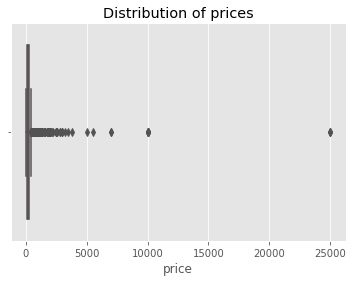

In [17]:
sns.boxplot(x= listings['price']) 
plt.title("Distribution of prices")

In [18]:
# Remove listings with price superior to 2300
print(len(listings))
listings = listings[listings.price <= 2300].copy()
print(len(listings))

6564
6536


Remove outliers in term of minimum_nights
Minimum_nights correspond to the minimum number of nights for the listings (not forced by the host but due to previous historical reservations)

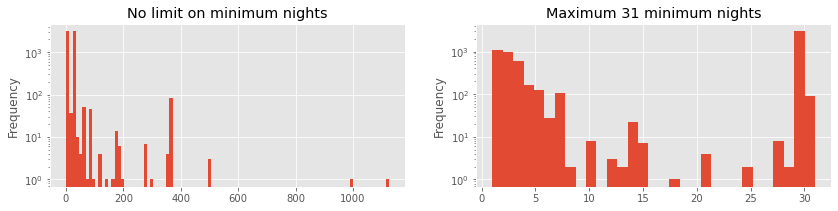

As a result of imposing minimum nights limit, 270 listings were removed.


In [19]:
listings_old=listings.copy()
listings = listings[listings["minimum_nights"] <=31].copy()
removed_listings = len(listings_old)-len(listings)

fig = plt.figure(figsize=(14,3))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)


ax1.hist(listings_old.minimum_nights, bins=100, log=True)
ax1.set_ylabel("Frequency")
ax1.set_title("No limit on minimum nights")

ax2.hist(listings.minimum_nights, bins=31, log=True)
ax2.set_ylabel("Frequency")
ax2.set_title("Maximum 31 minimum nights")

plt.show()

print("As a result of imposing minimum nights limit, " + str(removed_listings)+" listings were removed.")

Distribution of a few Numerical Columns

Text(0.5, 1.0, 'availability_365')

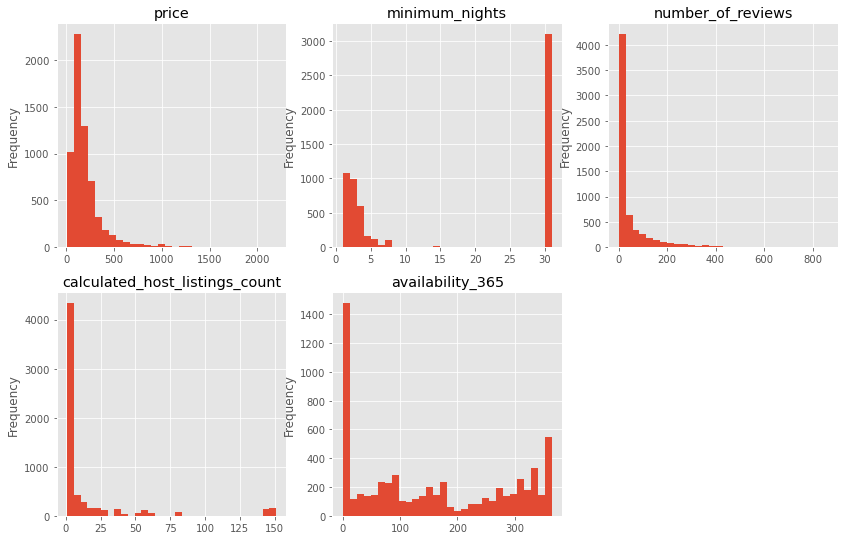

In [20]:
#separate out numerical variables
numeric_vars=['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']

fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)

ax1.hist(listings[numeric_vars[0]], bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title(numeric_vars[0])

ax2.hist(listings[numeric_vars[1]], bins=30)
ax2.set_ylabel("Frequency")
ax2.set_title(numeric_vars[1])

ax3.hist((listings[numeric_vars[2]]), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title(numeric_vars[2])

ax4.hist(listings[numeric_vars[3]], bins=31)
ax4.set_ylabel("Frequency")
ax4.set_title(numeric_vars[3])

ax5.hist(listings[numeric_vars[4]], bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title(numeric_vars[4])

Transformation of this columns to logarithm

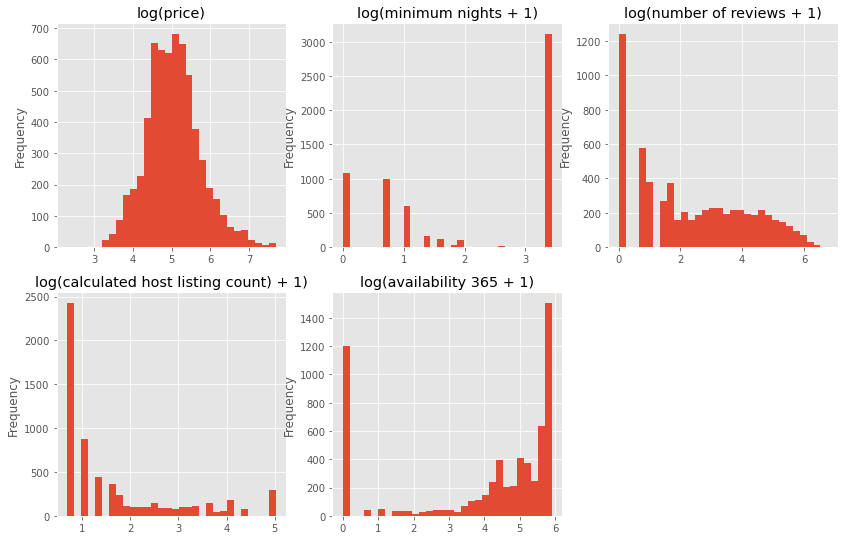

In [21]:
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4 = fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)

listings = listings[listings.price != 0].copy()
ax1.hist(np.log((listings[numeric_vars[0]])), bins=30)
ax1.set_ylabel("Frequency")
ax1.set_title('log(price)')

ax2.hist(np.log((listings[numeric_vars[1]])), bins=31)
ax2.set_ylabel("Frequency")
ax2.set_title("log(minimum nights + 1)")

ax3.hist(np.log(listings[numeric_vars[2]]+1), bins=30)
ax3.set_ylabel("Frequency")
ax3.set_title("log(number of reviews + 1)")

ax4.hist(np.log(listings[numeric_vars[3]]+1), bins=30)
ax4.set_ylabel("Frequency")
ax4.set_title("log(calculated host listing count) + 1)")

ax5.hist(np.log(listings[numeric_vars[4]]+1), bins=30)
ax5.set_ylabel("Frequency")
ax5.set_title("log(availability 365 + 1)")

plt.show()

In [22]:
listings['Log_price']=listings['price'].apply(lambda x: np.log(x))
listings['Log_minimum_nights']=listings['minimum_nights'].apply(lambda x: np.log(x+1))
listings['Log_number_of_reviews']=listings['number_of_reviews'].apply(lambda x: np.log(x+1))
listings['Log_calculated_host_listings_count']=listings['calculated_host_listings_count'].apply(lambda x: np.log(x+1))
listings['Log_availability_365']=listings['availability_365'].apply(lambda x: np.log(x+1))
listings.drop(['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365'],axis=1, inplace=True)

Convert non-numerical columns

In [23]:
listings.head()

,id,name,description,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekday_host_since,month_host_since,year_host_since,weekday_first_review,month_first_review,year_first_review,weekday_last_review,month_last_review,year_last_review,hosting_days,hosting_years,Log_price,Log_minimum_nights,Log_number_of_reviews,Log_calculated_host_listings_count,Log_availability_365
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,We are a family of four that live upstairs. W...,within an hour,100%,92%,t,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Western Addition,Entire serviced apartment,Entire home/apt,3,1 bath,1.0,2.0,"[""Keypad"", ""Refrigerator"", ""Wifi"", ""Iron"", ""Di...",30,2.0,2.0,1125.0,1125.0,2.0,1125.0,t,6,12,18,40,5,4.87,4.94,4.95,4.96,4.90,4.98,4.78,f,1,0,0,3.54,3.0,7.0,2008.0,6.0,10.0,2014.0,4.0,9.0,2021.0,4815 days,13.0,5.075174,1.098612,5.713733,0.693147,4.653960
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,Philip: English transplant to the Bay Area and...,NaN,NaN,NaN,f,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,Bernal Heights,Entire rental unit,Entire home/apt,5,1 bath,2.0,3.0,"[""Hair dryer"", ""Smoke alarm"", ""Heating"", ""Fire...",60,30.0,30.0,60.0,60.0,30.0,60.0,t,30,60,90,0,0,4.88,4.85,4.87,4.89,4.85,4.77,4.68,f,1,0,0,0.77,0.0,3.0,2009.0,1.0,11.0,2009.0,4.0,8.0,2015.0,4601 days,12.0,5.459586,3.433987,4.718499,0.693147,5.902633
4,8339,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,100%,0%,f,2.0,2.0,"['email', 'phone', 'reviews', 'kba']",t,t,Western Addition,Entire condominium (condo),Entire home/apt,4,1.5 baths,2.0,2.0,"[""TV"", ""Extra pillows and blankets"", ""Refriger...",111,7.0,7.0,111.0,111.0,7.0,111.0,t,30,60,90,0,0,4.87,4.88,5.00,4.94,5.00,4.94,4.75,f,2,0,0,0.19,3.0,7.0,2009.0,4.0,9.0,2009.0,4.0,6.0,2019.0,4479 days,12.0,6.796824,2.079442,3.367296,1.098612,5.902633
5,8739,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,Ivan is a publisher of a book for 4 year olds....,within an hour,100%,20%,t,2.0,2.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,Mission,Private room in condominium (condo),Private room,3,1 private bath,1.0,1.0,"[""Children\u2019s books and toys"", ""Extra pill...",14,13.0,13.0,14.0,14.0,13.0,14.0,t,23,47,77,1,0,4.91,4.95,4.94,4.95,4.96,4.93,4.74,f,0,2,0,7.17,1.0,1.0,2009.0,3.0,5.0,2013.0,2.0,8.0,2021.0,4635 days,12.0,5.129899,2.639057,6.602588,1.098612,5.123964
6,10251,Victorian Suite in Inner Mission,<b>The space</b><br />Please read this before ...,"Neighborhood is safe, sunny, lively and fun. ...",Coming from SF.,NaN,NaN,NaN,f,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,Mission,Entire residential home,Entire home/apt,4,1 bath,2.0,3.0,"[""Refrigerator"", ""Wifi"", ""Iron"", ""Dishes and s...",60,30.0,30.0

In [24]:
#convert room_type to dummies
listings = pd.concat([listings, pd.get_dummies(listings["room_type"], drop_first=False)], axis=1)
listings.drop(['room_type'],axis=1, inplace=True)

In [25]:
#convert neighbourhood_cleansed to dummies
listings = pd.concat([listings, pd.get_dummies(listings["neighbourhood_cleansed"], drop_first=False)], axis=1)
listings.drop(['neighbourhood_cleansed'],axis=1, inplace=True)

In [26]:
#convert host_response_time to dummies
listings = pd.concat([listings, pd.get_dummies(listings["host_response_time"], drop_first=False)], axis=1)
listings.drop(['host_response_time'],axis=1, inplace=True)

In [27]:
#convert property_type to dummies
listings = pd.concat([listings, pd.get_dummies(listings["property_type"], drop_first=False)], axis=1)
listings.drop(['property_type'],axis=1, inplace=True)
# column Private_room is duplicated
listings = listings.loc[:, ~listings.columns.duplicated()]

In [28]:
# Convert percentage to float
listings['host_response_rate']=listings['host_response_rate'].apply(lambda x: str(x)[:-1] if str(x)[-1]=="%" else np.nan)
listings['host_acceptance_rate']=listings['host_acceptance_rate'].apply(lambda x: str(x)[:-1] if str(x)[-1]=="%" else np.nan)

In [30]:
Liste=['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified','instant_bookable','has_availability']
for col in Liste:
    listings[col]=listings[col].apply(lambda x: 1 if x=="t" else 0)

Natural language features pre-processing

In [31]:
def bal_removal(text: str) -> str:
    '''
    function that takes a string as inout
    returns the same string without the html portion
    '''

    final = ''
    bal = False

    for letter in text:
        if letter == '<':
            bal = True
            final += ' '
    
        if not bal:
            final += letter
    
        elif letter == '>':
            bal = False
    
    return(final)

In [32]:
def text_cleaning(text):
    '''
    Function that applies all the classical lower case / stemming / tokenization techniques to a string
    '''
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    
    # Lower case
    text = text.lower()
    
    # Remove html portions
    text = bal_removal(text)
    
    # Remove punctuation and digits (and replace the punctuation with a space to treat special cases)
    new_text = ''

    for char in text:
        if char in punctuation:
            new_text += ' '
        elif not char.isdigit() and (char.isalnum() or char == ' '):
            new_text += char
            
    text = new_text
    
    # Tokenize
    text = word_tokenize(text)
    
    # Remove stopwords and stem
    text = [porter.stem(word) for word in text if not word in stop_words]
    
    # Detokenize
    text = TreebankWordDetokenizer().detokenize(text)
    
    return(text)

Natural language encoding

In [33]:
def nl_data_encoding(data, nl_col, nb_features):
    '''
    Function that takes as input a dataframe, a natural language column and a number of desired features
    Returns the encoded column for further integration in a ML model: vectorization + dimensionality reduction
    '''
    
    # Transform everything in strings
    data[nl_col] = data[nl_col].transform(str)
    
    # Clean and prepare the text
    data[nl_col] = data[nl_col].apply(text_cleaning)
    
    # Initiate the TF-IDF vectorizer
    tfidfvectorizer = TfidfVectorizer(analyzer = 'word' , stop_words='english',)
    
    # Fit the vectorizer
    tfidfvectorizer.fit(data[nl_col])
    
    # Vectorize the data
    vect = tfidfvectorizer.transform(data[nl_col])
    vect = pd.DataFrame(vect.toarray(), columns = tfidfvectorizer.get_feature_names())
    
    # First step of dim reduction: remove the columns with low variance
    ## Define the variance filter instance
    constant_filter = VarianceThreshold(threshold = 0.002)

    ## Fit it to our data 
    constant_filter.fit(vect)

    ## Features with enough variance
    feature_list = vect[vect.columns[constant_filter.get_support(indices=True)]]

    ## Only keep the relevant features
    vect = vect[list(feature_list)]
    
    # Second step of dim reduction: perform truncated SVD
    # Intiate the SVD instance 
    svd = TruncatedSVD(n_components = nb_features)

    # Fit transform
    vect = svd.fit(vect).transform(vect)

    cols = [str(nl_col) + '_svd_' + str(i) for i in range(nb_features)]
    vect = pd.DataFrame(data = vect, columns = cols)
    
    # Concatenate everything
    data = data.drop(columns = [nl_col])
    
    return(pd.concat([data, vect], axis = 1))  

In [34]:
nltk.download('stopwords')
nltk.download('punkt')

listings.description = listings.description.transform(str)

# Encode the name
listings = nl_data_encoding(data = listings, nl_col = 'name', nb_features = 10)

# Encode the description
listings = nl_data_encoding(data = listings, nl_col = 'description', nb_features = 10)

# Encode the neighborhood overview
listings = nl_data_encoding(data = listings, nl_col = 'neighborhood_overview', nb_features = 5)

# Encode the host description
listings = nl_data_encoding(data = listings, nl_col = 'host_about', nb_features = 5)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Encode the categorical natural language features

In [35]:
def verif_cleaning(lst):
    '''
    Function that cleans the verifications column
    '''
    verif_clean = lst.strip('][').split(', ')
    verif_clean = [str(verif.replace("'", "")) for verif in verif_clean]
    return(verif_clean)


def amenities_cleaning(lst):
    '''
    Function that cleans the verifications column
    '''
    amen_clean = lst.strip('][').split(', ')
    amen_clean = [str(amen.replace('"', '')) for amen in amen_clean]
    full_amen = ', '.join(amen_clean)
    return(full_amen)

In [36]:
listings.host_verifications = listings.host_verifications.transform(str)

In [37]:
# Encode the verifications
verifications = set()

for verifs in list(listings.host_verifications):
    verifs = verifs.strip('][').split(', ')
    for verif in verifs:
        verifications.add(verif)
        
verifications = list(verifications)


listings.host_verifications = listings.host_verifications.transform(str)
listings.host_verifications = listings.host_verifications.apply(verif_cleaning)

mlb = MultiLabelBinarizer()

verif = pd.DataFrame(mlb.fit_transform(listings.host_verifications),
                   columns = ['verif_' + clas for clas in mlb.classes_],
                   index = listings.host_verifications.index)

listings = pd.concat([listings.drop(columns = ['host_verifications']), verif], axis = 1)

In [38]:
# Encode the amenities
listings.amenities = listings.amenities.transform(str)
listings.amenities = listings.amenities.apply(amenities_cleaning)
listings = nl_data_encoding(data = listings, nl_col = 'amenities', nb_features = 5)

In [39]:
def bathroom_clean(text):
    text = str(text).lower()

    if 'half-bath' in text:
        return(0.5)

    text = text.replace('half-bath', '') 
    text = text.replace('shared', '')
    text = text.replace('baths', '')
    text = text.replace('bath', '')
    text = text.replace('private', '')
    text = text.replace(' ', '')
  
    if text == 'nan':
        return(np.nan)

    return(float(text))

In [40]:
listings.bathrooms_text = listings.bathrooms_text.apply(bathroom_clean)
listings.hosting_days = listings.hosting_days.apply(lambda x : x.days)

In [41]:
listings.host_response_rate = listings.host_response_rate.transform(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.transform(float)

In [42]:
listings.shape

(6566, 200)

In [43]:
listings.head()

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekday_host_since,month_host_since,year_host_since,weekday_first_review,month_first_review,year_first_review,weekday_last_review,month_last_review,year_last_review,hosting_days,hosting_years,Log_price,Log_minimum_nights,Log_number_of_reviews,Log_calculated_host_listings_count,Log_availability_365,Entire home/apt,Hotel room,Private room,Shared room,Bayview,Bernal Heights,Castro/Upper Market,Chinatown,Crocker Amazon,Diamond Heights,Downtown/Civic Center,Excelsior,Financial District,Glen Park,Golden Gate Park,Haight Ashbury,Inner Richmond,Inner Sunset,Lakeshore,Marina,Mission,Nob Hill,Noe Valley,North Beach,Ocean View,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Parkside,Potrero Hill,Presidio,Presidio Heights,Russian Hill,Seacliff,South of Market,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition,a few days or more,within a day,within a few hours,within an hour,Barn,Casa particular,Castle,Cycladic house,Entire bungalow,Entire cabin,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire in-law,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire villa,Floor,Private room in bed and breakfast,Private room in bungalow,Private room in casa particular,Private room in condominium (condo),Private room in cottage,Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in loft,Private room in rental unit,Private room in residential home,Private room in resort,Private room in serviced apartment,Private room in townhouse,Private room in treehouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in condominium (condo),Shared room in hostel,Shared room in loft,Shared room in rental unit,Shared room in residential home,Shared room in villa,Tiny house,name_svd_0,name_svd_1,name_svd_2,name_svd_3,name_svd_4,name_svd_5,name_svd_6,name_svd_7,name_svd_8,name_svd_9,description_svd_0,description_svd_1,description_svd_2,description_svd_3,description_svd_4,description_svd_5,description_svd_6,description_svd_7,description_svd_8,description_svd_9,neighborhood_overview_svd_0,neighborhood_overview_svd_1,neighborhood_overview_svd_2,neighborhood_overview_svd_3,neighborhood_overview_svd_4,host_about_svd_0,host_about_svd_1,host_about_svd_2,host_about_svd_3,host_about_svd_4,verif_None,verif_email,verif_facebook,verif_google,verif_government_id,verif_identity_manual,verif_jumio,verif_kba,verif_manual_offline,verif_manual_online,verif_nan,verif_offline_government_id,verif_phone,verif_reviews,verif_selfie,verif_sent_id,verif_work_email,verif_zhima_selfie,amenities_svd_0,amenities_svd_1,amenities_svd_2,amenities_svd_3,amenities_svd_4
0,958.0,100.0,92.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,6.0,12.0,18.0,40.0,5.0,4.87,4.94,4.95,4.96,4.90,4.98,4.78,0.0,1.0,0.0,0.0,3.54,3.0,7.0,2008.0,6.0,10.0,2014.0,4.0,9.0,2021.0,4815.0,13.0,5.075174,1.098612,5.713733,0.693147,4.653960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

Pandas profiling

Deal with NaNs

In [44]:
listings = listings.dropna(subset = ['host_has_profile_pic', 'review_scores_accuracy'])

In [45]:
columns = listings.columns

for col in columns:
    listings[col] = listings[col].fillna(listings[col].median())

In [46]:
listings.head(10)

,id,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekday_host_since,month_host_since,year_host_since,weekday_first_review,month_first_review,year_first_review,weekday_last_review,month_last_review,year_last_review,hosting_days,hosting_years,Log_price,Log_minimum_nights,Log_number_of_reviews,Log_calculated_host_listings_count,Log_availability_365,Entire home/apt,Hotel room,Private room,Shared room,Bayview,Bernal Heights,Castro/Upper Market,Chinatown,Crocker Amazon,Diamond Heights,Downtown/Civic Center,Excelsior,Financial District,Glen Park,Golden Gate Park,Haight Ashbury,Inner Richmond,Inner Sunset,Lakeshore,Marina,Mission,Nob Hill,Noe Valley,North Beach,Ocean View,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Parkside,Potrero Hill,Presidio,Presidio Heights,Russian Hill,Seacliff,South of Market,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition,a few days or more,within a day,within a few hours,within an hour,Barn,Casa particular,Castle,Cycladic house,Entire bungalow,Entire cabin,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire in-law,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire villa,Floor,Private room in bed and breakfast,Private room in bungalow,Private room in casa particular,Private room in condominium (condo),Private room in cottage,Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in loft,Private room in rental unit,Private room in residential home,Private room in resort,Private room in serviced apartment,Private room in townhouse,Private room in treehouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in condominium (condo),Shared room in hostel,Shared room in loft,Shared room in rental unit,Shared room in residential home,Shared room in villa,Tiny house,name_svd_0,name_svd_1,name_svd_2,name_svd_3,name_svd_4,name_svd_5,name_svd_6,name_svd_7,name_svd_8,name_svd_9,description_svd_0,description_svd_1,description_svd_2,description_svd_3,description_svd_4,description_svd_5,description_svd_6,description_svd_7,description_svd_8,description_svd_9,neighborhood_overview_svd_0,neighborhood_overview_svd_1,neighborhood_overview_svd_2,neighborhood_overview_svd_3,neighborhood_overview_svd_4,host_about_svd_0,host_about_svd_1,host_about_svd_2,host_about_svd_3,host_about_svd_4,verif_None,verif_email,verif_facebook,verif_google,verif_government_id,verif_identity_manual,verif_jumio,verif_kba,verif_manual_offline,verif_manual_online,verif_nan,verif_offline_government_id,verif_phone,verif_reviews,verif_selfie,verif_sent_id,verif_work_email,verif_zhima_selfie,amenities_svd_0,amenities_svd_1,amenities_svd_2,amenities_svd_3,amenities_svd_4
0,958.0,100.0,92.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,1.0,2.0,30.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,6.0,12.0,18.0,40.0,5.0,4.87,4.94,4.95,4.96,4.90,4.98,4.78,0.0,1.0,0.0,0.0,3.54,3.0,7.0,2008.0,6.0,10.0,2014.0,4.0,9.0,2021.0,4815.0,13.0,5.075174,1.098612,5.713733,0.693147,4.653960,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

### Sentiment Analysis

In [47]:
# reviews.dropna(inplace=True, how='any')
# reviews = df_reviews.drop(['id', 'reviewer_id'], axis=1)
reviews = reviews[reviews['comments'].notna()]
reviews['p_comments'] = reviews['comments'].apply(text_cleaning)

In [48]:
analyzer = SentimentIntensityAnalyzer()
list_neg, list_neu, list_pos, list_compound = [], [], [], []
for sentence in reviews['p_comments']:
    vs = analyzer.polarity_scores(sentence)
    list_neg.append(vs['neg'])
    list_neu.append(vs['neu'])
    list_pos.append(vs['pos'])
    list_compound.append(vs['compound'])

reviews['neg'] = pd.DataFrame(list_neg)
reviews['neu'] = pd.DataFrame(list_neu)
reviews['pos'] = pd.DataFrame(list_pos)
reviews['compound'] = pd.DataFrame(list_compound)

reviews_mean = reviews.groupby(['listing_id']).mean()
reviews_mean.head(10)

,id,reviewer_id,weekday_review_date,month_review_date,year_review_date,neg,neu,pos,compound
listing_id,,,,,,,,,
958,2.394539e+16,5.922175e+07,3.132450,6.943709,2017.695364,0.013043,0.615977,0.364354,0.767404
5858,4.695844e+06,3.013423e+06,3.396396,6.630631,2010.684685,0.015180,0.619180,0.365649,0.809251
7918,8.283449e+07,2.633229e+07,1.947368,7.315789,2013.947368,0.045053,0.615053,0.339895,0.698216
8142,9.334614e+07,5.817747e+07,3.125000,8.000000,2015.500000,0.012125,0.615000,0.372875,0.745737
8339,5.479450e+07,1.342816e+07,2.214286,7.107143,2012.321429,0.027500,0.630857,0.341500,0.909711
8739,5.729816e+14,2.841264e+07,3.074728,6.495924,2015.278533,0.010819,0.602397,0.386784,0.821982
10251,1.280621e+15,2.342918e+07,2.985251,6.238938,2014.353982,0.013422,0.611289,0.375289,0.790753
10578,8.635412e+06,5.908956e+06,3.333333,4.777778,2012.944444,0.020778,0.585611,0.393722,0.881506
10820,3.401166e+07,1.353054e+07,2.702703,7.108108,2013.810811,0.031784,0.591946,0.376243,0.745638


## Feature Selection

Correlation between numerical features

In [49]:
listings_columns = listings.columns.to_list()

In [50]:
Numerical_columnns=['Log_price',
 'Log_minimum_nights',
 'Log_number_of_reviews',
 'Log_calculated_host_listings_count',
 'Log_availability_365',
 'host_listings_count',
 'host_total_listings_count',
  'host_is_superhost',
  'host_response_rate',
  'host_response_rate',
  'host_has_profile_pic',
  'host_identity_verified',
  'instant_bookable',
  'has_availability',
  'availability_30',
 'availability_60',
 'availability_90',
 'accommodates',
 'bedrooms',
 'beds']

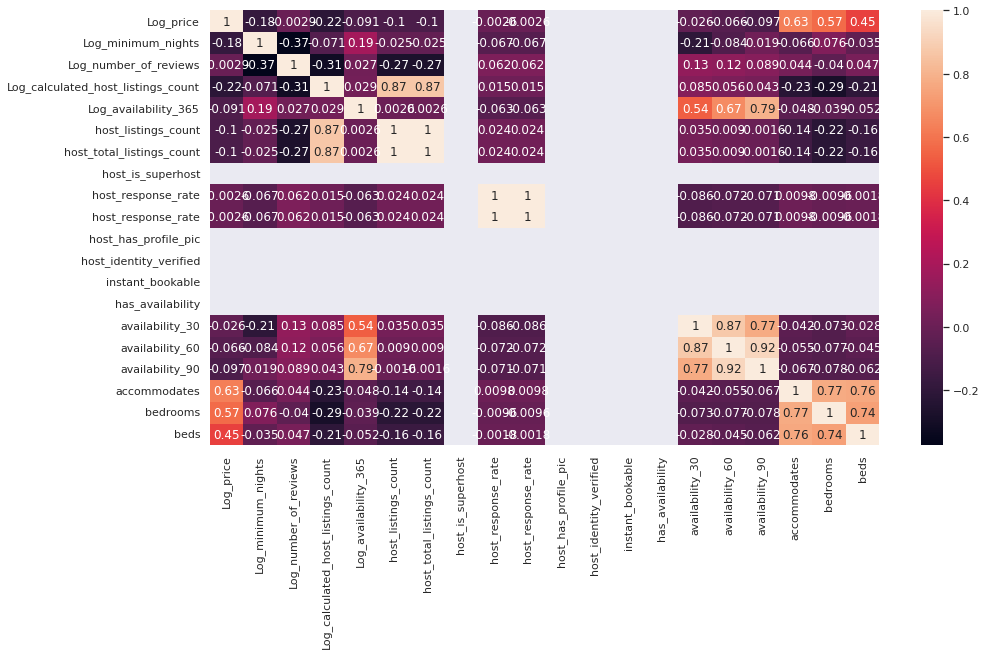

In [51]:
sns.set(rc = {'figure.figsize':(15,8)})

x = listings[Numerical_columnns].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

Observations on price:

price seems to be positively correlated with accomodates, the number of beds and the number of bedrooms 

In [52]:
listings=listings.drop(['host_total_listings_count','host_listings_count'],axis=1)

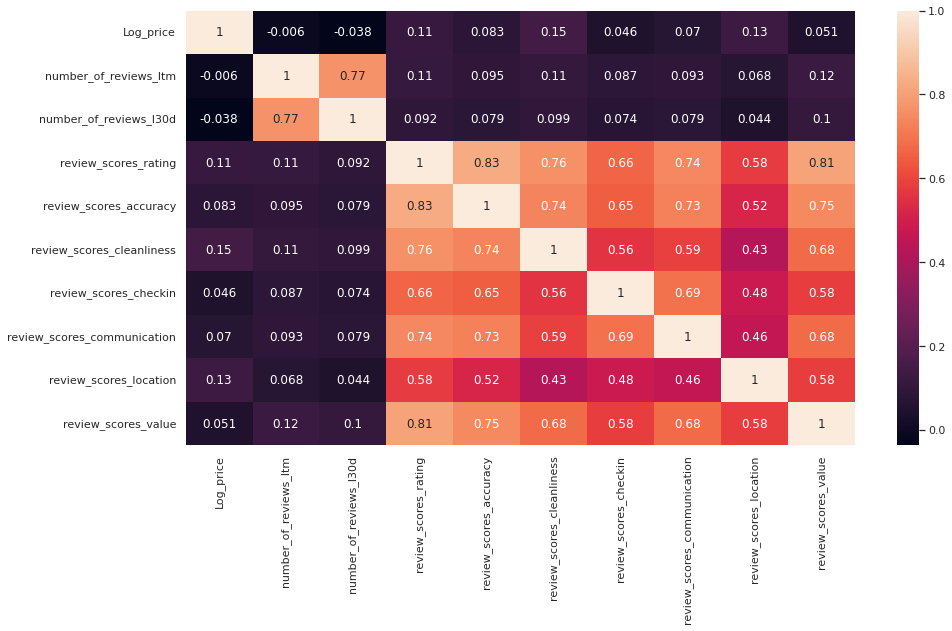

In [53]:
 Columns_study=['Log_price',
                'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

x = listings[Columns_study].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

In [54]:
listings = listings.drop(['number_of_reviews_l30d','review_scores_rating'],axis=1)

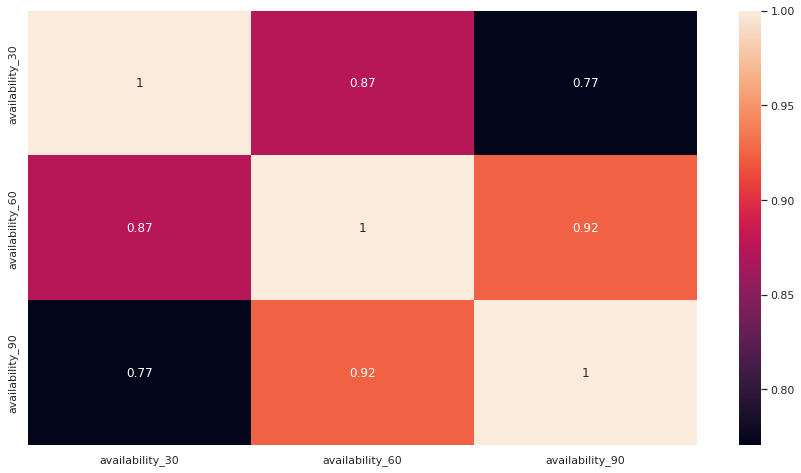

In [55]:
Columns_study=[ 'availability_30',
 'availability_60',
 'availability_90']

x = listings[Columns_study].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

We observe a very high correlation between availability 30, 60 and 90 so we perhaps only keep one of those 3 features

In [56]:
listings = listings.drop(columns = ['availability_60','availability_90'])

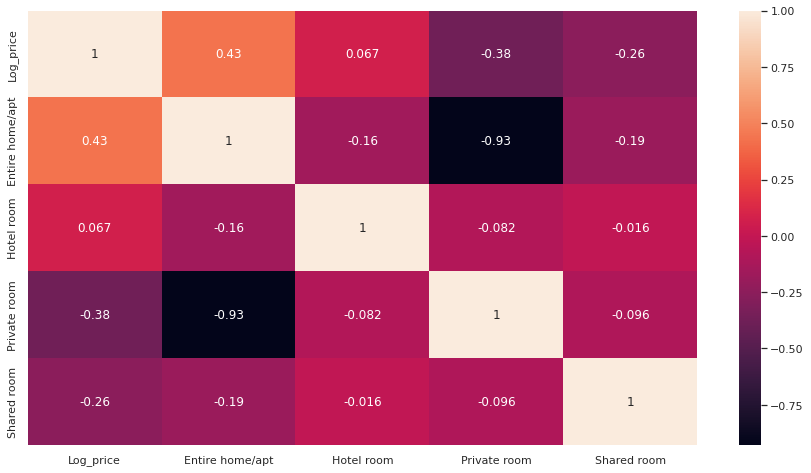

In [57]:
Columns_study=[ 'Log_price',
               'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room']

x = listings[Columns_study].apply(lambda x: np.log(np.abs(x+1))).corr(method='pearson')
sns.heatmap(x, annot=True)
plt.show()

### Removing irrelevant columns from the `reviews` for merge

In [58]:
# id	reviewer_id	weekday_review_date	month_review_date	year_review_date	neg	neu	pos	compound

reviews_mean.drop(['id',
                   'reviewer_id',
                   'weekday_review_date',
                   'month_review_date',
                   'year_review_date',
                   'neg', 'neu', 'pos'], axis=1, inplace=True)

reviews_mean.head(10)
# Merge

reviews_mean = reviews_mean[reviews_mean['compound'].notna()]
listings = pd.merge(reviews_mean, listings, left_index=True, right_on='id')

In [59]:
X = listings.drop(['Log_price','id'], axis =1)
y = listings['Log_price']

In [60]:
len(X.columns)

193

In [62]:
# instantiate SelectKBest to determine 20 best features
best_features = SelectKBest(score_func=f_classif, k=120)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
# concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores],axis=1)
feature_scores.columns = ['Feature_Name','Score']  # name output columns
feature_scores=feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_scores[:120]

,Feature_Name,Score
0,host_has_profile_pic,33.813461
1,Private room in resort,23.567055
2,Castle,16.537801
3,calculated_host_listings_count_private_rooms,11.555821
4,bedrooms,10.090313
...,...,...
115,neighborhood_overview_svd_4,1.264208
116,Western Addition,1.252950
117,neighborhood_overview_svd_3,1.249912
118,host_about_svd_4,1.243909


## Model

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

### Linear Regression

In [91]:
X_train

,compound,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,number_of_reviews_ltm,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,weekday_host_since,month_host_since,year_host_since,weekday_first_review,month_first_review,year_first_review,weekday_last_review,month_last_review,year_last_review,hosting_days,hosting_years,Log_minimum_nights,Log_number_of_reviews,Log_calculated_host_listings_count,Log_availability_365,Entire home/apt,Hotel room,Private room,Shared room,Bayview,Bernal Heights,Castro/Upper Market,Chinatown,Crocker Amazon,Diamond Heights,Downtown/Civic Center,Excelsior,Financial District,Glen Park,Golden Gate Park,Haight Ashbury,Inner Richmond,Inner Sunset,Lakeshore,Marina,Mission,Nob Hill,Noe Valley,North Beach,Ocean View,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Parkside,Potrero Hill,Presidio,Presidio Heights,Russian Hill,Seacliff,South of Market,Twin Peaks,Visitacion Valley,West of Twin Peaks,Western Addition,a few days or more,within a day,within a few hours,within an hour,Barn,Casa particular,Castle,Cycladic house,Entire bungalow,Entire cabin,Entire condominium (condo),Entire cottage,Entire guest suite,Entire guesthouse,Entire in-law,Entire loft,Entire place,Entire rental unit,Entire residential home,Entire serviced apartment,Entire townhouse,Entire villa,Floor,Private room in bed and breakfast,Private room in bungalow,Private room in casa particular,Private room in condominium (condo),Private room in cottage,Private room in farm stay,Private room in guest suite,Private room in guesthouse,Private room in hostel,Private room in loft,Private room in rental unit,Private room in residential home,Private room in resort,Private room in serviced apartment,Private room in townhouse,Private room in treehouse,Private room in villa,Room in aparthotel,Room in bed and breakfast,Room in boutique hotel,Room in hostel,Room in hotel,Room in serviced apartment,Shared room in bed and breakfast,Shared room in condominium (condo),Shared room in hostel,Shared room in loft,Shared room in rental unit,Shared room in residential home,Shared room in villa,Tiny house,name_svd_0,name_svd_1,name_svd_2,name_svd_3,name_svd_4,name_svd_5,name_svd_6,name_svd_7,name_svd_8,name_svd_9,description_svd_0,description_svd_1,description_svd_2,description_svd_3,description_svd_4,description_svd_5,description_svd_6,description_svd_7,description_svd_8,description_svd_9,neighborhood_overview_svd_0,neighborhood_overview_svd_1,neighborhood_overview_svd_2,neighborhood_overview_svd_3,neighborhood_overview_svd_4,host_about_svd_0,host_about_svd_1,host_about_svd_2,host_about_svd_3,host_about_svd_4,verif_None,verif_email,verif_facebook,verif_google,verif_government_id,verif_identity_manual,verif_jumio,verif_kba,verif_manual_offline,verif_manual_online,verif_nan,verif_offline_government_id,verif_phone,verif_reviews,verif_selfie,verif_sent_id,verif_work_email,verif_zhima_selfie,amenities_svd_0,amenities_svd_1,amenities_svd_2,amenities_svd_3,amenities_svd_4
395,0.653923,100.0,96.0,0.0,0.0,0.0,5.0,1.0,2.0,2.0,1125.0,29.0,29.0,1125.0,1125.0,29.0,1125.0,0.0,0.0,0.0,4.89,4.67,4.81,5.00,4.74,4.67,0.0,1.0,0.0,0.0,0.37,1.0,1.0,2012.0,2.0,1.0,2015.0,0.0,9.0,2019.0,3557.0,9.0,3.401197,3.433987,0.693147,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [76]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(3460, 193)
(1484, 193)


In [79]:
X_train_st_sc = sm.add_constant(X_train_scaled)
X_test_st_sc = sm.add_constant(X_test_scaled, has_constant='add')

In [80]:
model_LR = sm.OLS(y_train, X_train_st_sc).fit()
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     51.70
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:49:41   Log-Likelihood:                -1322.5
No. Observations:                3460   AIC:                             2997.
Df Residuals:                    3284   BIC:                             4079.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0529      0.006    816.542      0.0

In [81]:
model_LR.predict(X_test_st_sc)

array([4.65861986, 6.00949319, 5.49231127, ..., 5.01699824, 5.95191125,
       5.52667257])

In [82]:
r2_score(y_test, model_LR.predict(X_test_st_sc))

0.7207926097359164

In [83]:
 MAE(y_test, model_LR.predict(X_test_st_sc))

0.26865440030913756

In [84]:
RMSE(y_test, model_LR.predict(X_test_st_sc))

0.3636026465783671

In [85]:
for c in range(0,len(sm.add_constant(X_train).columns)-1,1):
    print(f"Variable: {sm.add_constant(X_train).columns[c]}, p-value: {model_LR.pvalues[c]<0.05:0.3f}")

Variable: const, p-value: 1.000
Variable: compound, p-value: 0.000
Variable: host_response_rate, p-value: 1.000
Variable: host_acceptance_rate, p-value: 0.000
Variable: host_is_superhost, p-value: 0.000
Variable: host_has_profile_pic, p-value: 0.000
Variable: host_identity_verified, p-value: 0.000
Variable: accommodates, p-value: 1.000
Variable: bathrooms_text, p-value: 0.000
Variable: bedrooms, p-value: 1.000
Variable: beds, p-value: 1.000
Variable: maximum_nights, p-value: 0.000
Variable: minimum_minimum_nights, p-value: 1.000
Variable: maximum_minimum_nights, p-value: 0.000
Variable: minimum_maximum_nights, p-value: 0.000
Variable: maximum_maximum_nights, p-value: 0.000
Variable: minimum_nights_avg_ntm, p-value: 0.000
Variable: maximum_nights_avg_ntm, p-value: 0.000
Variable: has_availability, p-value: 0.000
Variable: availability_30, p-value: 1.000
Variable: number_of_reviews_ltm, p-value: 1.000
Variable: review_scores_accuracy, p-value: 1.000
Variable: review_scores_cleanliness, p

In [86]:
X_lr = X[['compound','host_response_rate','host_is_superhost','host_identity_verified','accommodates','bedrooms','beds','minimum_minimum_nights','availability_30','number_of_reviews_ltm','review_scores_cleanliness','review_scores_checkin','review_scores_value','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','month_last_review','year_last_review','Log_number_of_reviews','Log_calculated_host_listings_count','Entire home/apt','Hotel room','Private room','Shared room','Bayview','Bernal Heights','Castro/Upper Market','Crocker Amazon','Excelsior','Financial District','Haight Ashbury','Lakeshore','Marina','Nob Hill','Noe Valley','North Beach','Ocean View','Outer Mission','Outer Richmond','Outer Sunset','Pacific Heights','Parkside','Potrero Hill','Presidio','Russian Hill','South of Market','Visitacion Valley','West of Twin Peaks','Western Addition','a few days or more','Private room in bed and breakfast','Private room in bungalow','Private room in resort','Room in serviced apartment','Shared room in bed and breakfast','Shared room in hostel','Shared room in rental unit','Shared room in residential home','Shared room in villa','description_svd_5','description_svd_6','description_svd_7','neighborhood_overview_svd_0','neighborhood_overview_svd_2','host_about_svd_2','host_about_svd_3','host_about_svd_4','verif_facebook','verif_identity_manual','verif_kba','verif_manual_offline','verif_manual_online','verif_selfie','verif_work_email','amenities_svd_1','amenities_svd_3']]

In [87]:
X_lr

,compound,host_response_rate,host_is_superhost,host_identity_verified,accommodates,bedrooms,beds,minimum_minimum_nights,availability_30,number_of_reviews_ltm,review_scores_cleanliness,review_scores_checkin,review_scores_value,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,month_last_review,year_last_review,Log_number_of_reviews,Log_calculated_host_listings_count,Entire home/apt,Hotel room,Private room,Shared room,Bayview,Bernal Heights,Castro/Upper Market,Crocker Amazon,Excelsior,Financial District,Haight Ashbury,Lakeshore,Marina,Nob Hill,Noe Valley,North Beach,Ocean View,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Parkside,Potrero Hill,Presidio,Russian Hill,South of Market,Visitacion Valley,West of Twin Peaks,Western Addition,a few days or more,Private room in bed and breakfast,Private room in bungalow,Private room in resort,Room in serviced apartment,Shared room in bed and breakfast,Shared room in hostel,Shared room in rental unit,Shared room in residential home,Shared room in villa,description_svd_5,description_svd_6,description_svd_7,neighborhood_overview_svd_0,neighborhood_overview_svd_2,host_about_svd_2,host_about_svd_3,host_about_svd_4,verif_facebook,verif_identity_manual,verif_kba,verif_manual_offline,verif_manual_online,verif_selfie,verif_work_email,amenities_svd_1,amenities_svd_3
0,0.767404,100.0,0.0,0.0,3.0,1.0,2.0,2.0,6.0,40.0,4.95,4.96,4.78,1.0,0.0,0.0,9.0,2021.0,5.713733,0.693147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053107,-0.000255,0.008106,2.243881e-14,-9.510451e-02,-7.101254e-02,2.228216e-02,-2.946987e-02,1,0,1,0,0,0,0,-0.117120,0.186020
1,0.809251,100.0,0.0,0.0,5.0,2.0,3.0,30.0,30.0,0.0,4.87,4.89,4.68,1.0,0.0,0.0,8.0,2015.0,4.718499,0.693147,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.012484,-0.033959,-0.025530,1.187413e-14,-6.423393e-02,3.379604e-02,1.114983e-01,-2.115683e-02,0,0,1,0,0,0,1,0.285271,-0.335552
4,0.909711,100.0,0.0,0.0,4.0,2.0,2.0,7.0,30.0,0.0,5.00,4.94,4.75,2.0,0.0,0.0,6.0,2019.0,3.367296,1.098612,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006220,-0.005932,-0.016796,1.000000e+00,-6.201749e-17,-1.187954e-01,2.463302e-01,-4.284511e-03,0,0,1,0,0,0,0,-0.225604,-0.096323
5,0.821982,100.0,0.0,0.0,3.0,1.0,1.0,13.0,23.0,1.0,4.94,4.95,4.74,0.0,2.0,0.0,8.0,2021.0,6.602588,1.098612,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049150,-0.075072,0.135111,3.516695e-14,-3.744196e-03,-5.141991e-03,-1.716457e-02,-5.614644e-02,0,1,1,0,0,1,1,-0.030934,0.298600
6,0.790753,100.0,0.0,0.0,4.0,2.0,3.0,30.0,4.0,2.0,4.93,4.82,4.65,1.0,0.0,0.0,8.0,2021.0,5.828946,0.693147,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018001,0.048481,0.077202,4.733868e-14,-1.005374e-01,-1.607234e-01,4.446785e-01,-9.547808e-02,1,0,1,0,0,0,0,-0.072010,0.158326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6374,0.636900,100.0,0.0,0.0,3.0,2.0,0.0,30.0,1.0,1.0,5.00,5.00,5.00,1.0,0.0,0.0,10.0,2021.0,0.693147,0.693147,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.093141,0.120357,-0.013802,1.000000e+00,-6.201749e-

In [88]:
X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(X_lr,y, test_size=0.30, random_state=1)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_K_scaled = scaler.fit_transform(X_train_K)
X_test_K_scaled = scaler.transform(X_test_K)
X_train_K_st_sc = sm.add_constant(X_train_K_scaled)
X_test_K_st_sc = sm.add_constant(X_test_K_scaled, has_constant='add')
model_K_LR = sm.OLS(y_train_K, X_train_K_st_sc).fit()
print(model_LR.summary())

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     51.70
Date:                Fri, 17 Dec 2021   Prob (F-statistic):               0.00
Time:                        18:50:06   Log-Likelihood:                -1322.5
No. Observations:                3460   AIC:                             2997.
Df Residuals:                    3284   BIC:                             4079.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0529      0.006    816.542      0.0

In [90]:
r2_score(y_test_K, model_K_LR.predict(X_test_K_st_sc))

0.7158726739481487

#### RIDGE REGRESSION

In [92]:
import warnings
warnings.filterwarnings('ignore')

In [93]:
np.logspace(-1, 5, num=50, base=10)

array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1.59985872e+01, 2.12095089e+01,
       2.81176870e+01, 3.72759372e+01, 4.94171336e+01, 6.55128557e+01,
       8.68511374e+01, 1.15139540e+02, 1.52641797e+02, 2.02358965e+02,
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])

In [94]:
alpha_grid = np.logspace(-1, 5, num=50, base=10)
coefs = []

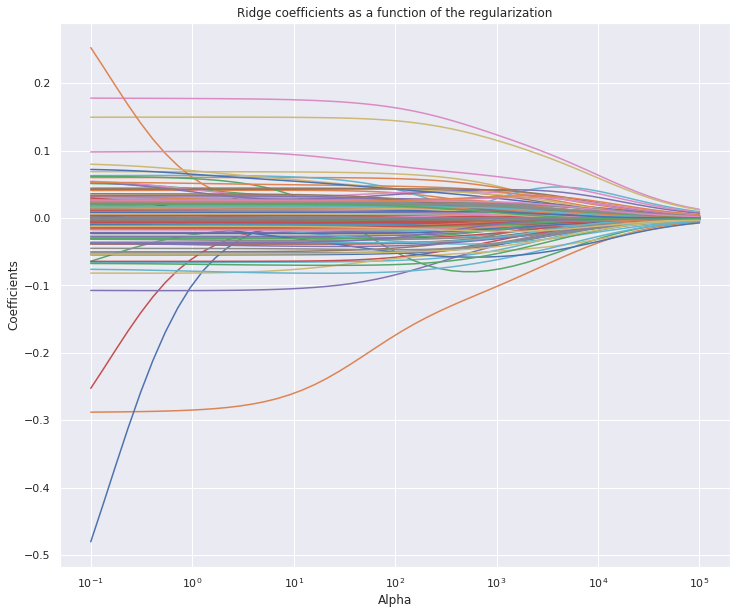

In [95]:
for a in alpha_grid:
    rr = Ridge(alpha=a, fit_intercept=False, random_state=88)
    rr.fit(X_train_scaled, y_train)
    coefs.append(rr.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alpha_grid, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

In [96]:
alpha_grid = {'alpha': np.logspace(-1, 5, num=50, base=10)}

rr = Ridge(random_state=88)
rr_cv = GridSearchCV(rr, alpha_grid, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': array([1.00000000e-01, 1.32571137e-01, 1.75751062e-01, 2.32995181e-01,
       3.08884360e-01, 4.09491506e-01, 5.42867544e-01, 7.19685673e-01,
       9.54095476e-01, 1.26485522e+00, 1.67683294e+00, 2.22299648e+00,
       2.94705170e+00, 3.90693994e+00, 5.17947468e+00, 6.86648845e+00,
       9.10298178e+00, 1.20679264e+01, 1...
       2.68269580e+02, 3.55648031e+02, 4.71486636e+02, 6.25055193e+02,
       8.28642773e+02, 1.09854114e+03, 1.45634848e+03, 1.93069773e+03,
       2.55954792e+03, 3.39322177e+03, 4.49843267e+03, 5.96362332e+03,
       7.90604321e+03, 1.04811313e+04, 1.38949549e+04, 1.84206997e+04,
       2.44205309e+04, 3.23745754e+04, 4.29193426e+04, 5.68986603e+04,
       7.54312006e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [97]:
def one_standard_error_rule(model, results, param_grid, n_splits, neg_mean_squared_error=True):
    
    assert neg_mean_squared_error == True # function is defined specifically for neg_mean_squared_error
    
    #find model with minimum error, then select the simplest model
    #whose mean falls within 1 standard deviation of the minimum
    
    range_x = param_grid # results['param_'+list(param_grid.keys())[0]].data
    std_vs_x  = pd.Series(results['std_test_score'], index = range_x)
    sem_vs_x  = std_vs_x/np.sqrt(n_splits)
    
    mean_vs_x = pd.Series(results['mean_test_score'], index = range_x)        
    mean_vs_x = mean_vs_x*(-1)
    
    x_min = mean_vs_x.idxmin()
    sem = sem_vs_x[x_min]
    

    if (model=='pcr'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.min()
    elif (model=='ridge') | (model=='lasso'):
        x_1se = mean_vs_x[mean_vs_x <= min(mean_vs_x) + sem].index.max()
        
    #x_1se_idx = int(np.argwhere(range_x == x_1se)[0])
    
    return x_min, x_1se

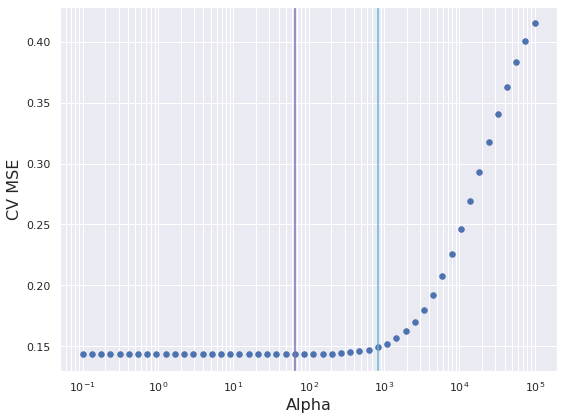

In [98]:
range_alpha = rr_cv.cv_results_['param_alpha'].data
MSE_scores = rr_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='ridge',
                                       results=rr_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [99]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 828.6427728546843


In [101]:
rr_cv = GridSearchCV(rr, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
rr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=88),
             param_grid={'alpha': [828.6427728546843]},
             scoring='neg_mean_squared_error')

In [102]:
print('Naive LR OSR2: ', r2_score(y_test, model_LR.predict(X_test_st_sc)))
print('Ridge LR OSR2: ', r2_score(y_test, rr_cv.predict(X_test_scaled)))

Naive LR OSR2:  0.7207926097359164
Ridge LR OSR2:  0.7089602074669749


#### LASSO

In [103]:
alphas = np.logspace(-5, 1 , num=50, base=10)
coefs = []

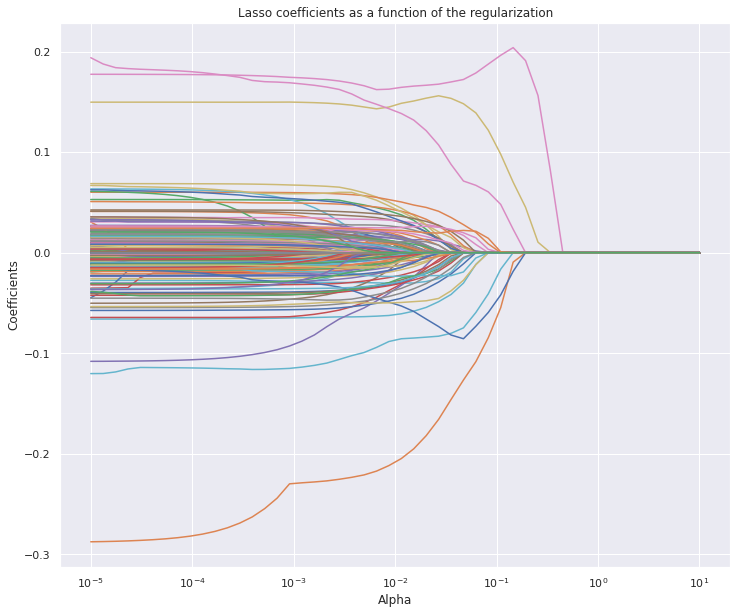

In [104]:
from sklearn.linear_model import Lasso

for a in alphas:
    lasso = Lasso(alpha=a, random_state=88)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(12, 10))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

In [105]:
alpha_grid = {'alpha': np.logspace(-8, -1, num=50, base=10)}

lasso_cv = GridSearchCV(lasso, alpha_grid, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': array([1.00000000e-08, 1.38949549e-08, 1.93069773e-08, 2.68269580e-08,
       3.72759372e-08, 5.17947468e-08, 7.19685673e-08, 1.00000000e-07,
       1.38949549e-07, 1.93069773e-07, 2.68269580e-07, 3.72759372e-07,
       5.17947468e-07, 7.19685673e-07, 1.00000000e-06, 1.38949549e-06,
       1.93069773e-06, 2.682...
       1.00000000e-04, 1.38949549e-04, 1.93069773e-04, 2.68269580e-04,
       3.72759372e-04, 5.17947468e-04, 7.19685673e-04, 1.00000000e-03,
       1.38949549e-03, 1.93069773e-03, 2.68269580e-03, 3.72759372e-03,
       5.17947468e-03, 7.19685673e-03, 1.00000000e-02, 1.38949549e-02,
       1.93069773e-02, 2.68269580e-02, 3.72759372e-02, 5.17947468e-02,
       7.19685673e-02, 1.00000000e-01])},
             scoring='neg_mean_squared_error')

In [106]:
r2_score(y_test,lasso_cv.predict(X_test_scaled))

0.7230037377731277

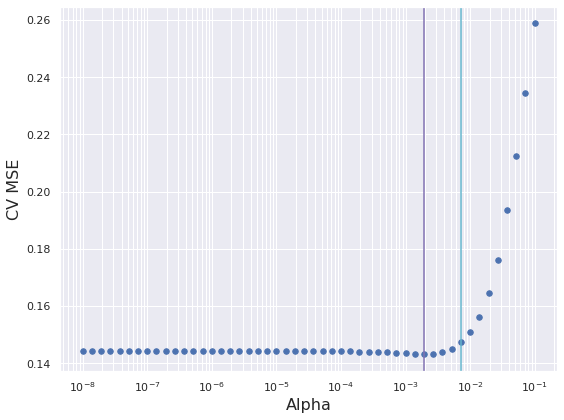

In [107]:
range_alpha = lasso_cv.cv_results_['param_alpha'].data
MSE_scores = lasso_cv.cv_results_['mean_test_score']*(-1)
x_min, x_1se = one_standard_error_rule(model='lasso',
                                       results=lasso_cv.cv_results_,
                                       param_grid=range_alpha,
                                       n_splits=10,
                                       neg_mean_squared_error=True)
plt.figure(figsize=(8, 6))
ax = plt.gca()
ax.set_xscale('log')
plt.xlabel('Alpha', fontsize=16)
plt.ylabel('CV MSE', fontsize=16)
plt.scatter(range_alpha, MSE_scores, s=30)
plt.axvline(x=x_min, color='m')
plt.axvline(x=x_1se, color='c')
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

In [108]:
print('Alpha one standard error rule:', x_1se)

Alpha one standard error rule: 0.007196856730011514


In [109]:
lasso_cv = GridSearchCV(lasso, {'alpha': [x_1se]}, scoring='neg_mean_squared_error', cv=10)
lasso_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(alpha=10.0, random_state=88),
             param_grid={'alpha': [0.007196856730011514]},
             scoring='neg_mean_squared_error')

In [110]:
print('Naive LR OSR2: ', r2_score(y_test, model_LR.predict(X_test_st_sc)))
print('Lasso LR OSR2: ', r2_score(y_test, lasso_cv.predict(X_test_scaled)))

Naive LR OSR2:  0.7207926097359164
Lasso LR OSR2:  0.7155698121472569


In [127]:
print('Naive', RMSE(y_test, model_LR.predict(X_test_st_sc)))
print('Ridge', RMSE(y_test, rr_cv.predict(X_test_scaled)))
print('Lasso', RMSE(y_test, lasso_cv.predict(X_test_scaled)))

Naive 0.3636026465783671
Ridge 0.37122718069039207
Lasso 0.36698762940318774


**Random Forest**

In [112]:
import time

grid_values = {'max_features': np.linspace(1, len(X_train.columns), 75, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [88]} 

tic = time.time()

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 7376.59 s


(0.0, 1.0)

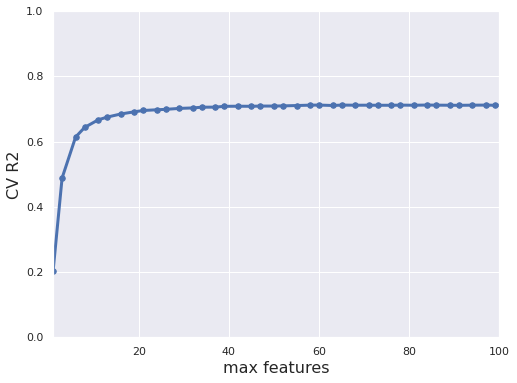

In [113]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 100])
plt.ylim([0, 1])

In [114]:
print(rf_cv.best_params_)

{'max_features': 84, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [115]:
print('CV R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, rf_cv.predict(X_test)), 5))

CV R2: 0.71213
OSR2: 0.74289


In [116]:
pd.DataFrame({'Feature' : X_train.columns, 
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)

,Feature,Importance score
0,compound,0.4
1,host_response_rate,0.2
2,host_acceptance_rate,0.7
3,host_is_superhost,0.0
4,host_has_profile_pic,0.0
...,...,...
188,amenities_svd_0,0.5
189,amenities_svd_1,1.0
190,amenities_svd_2,0.6
191,amenities_svd_3,1.8


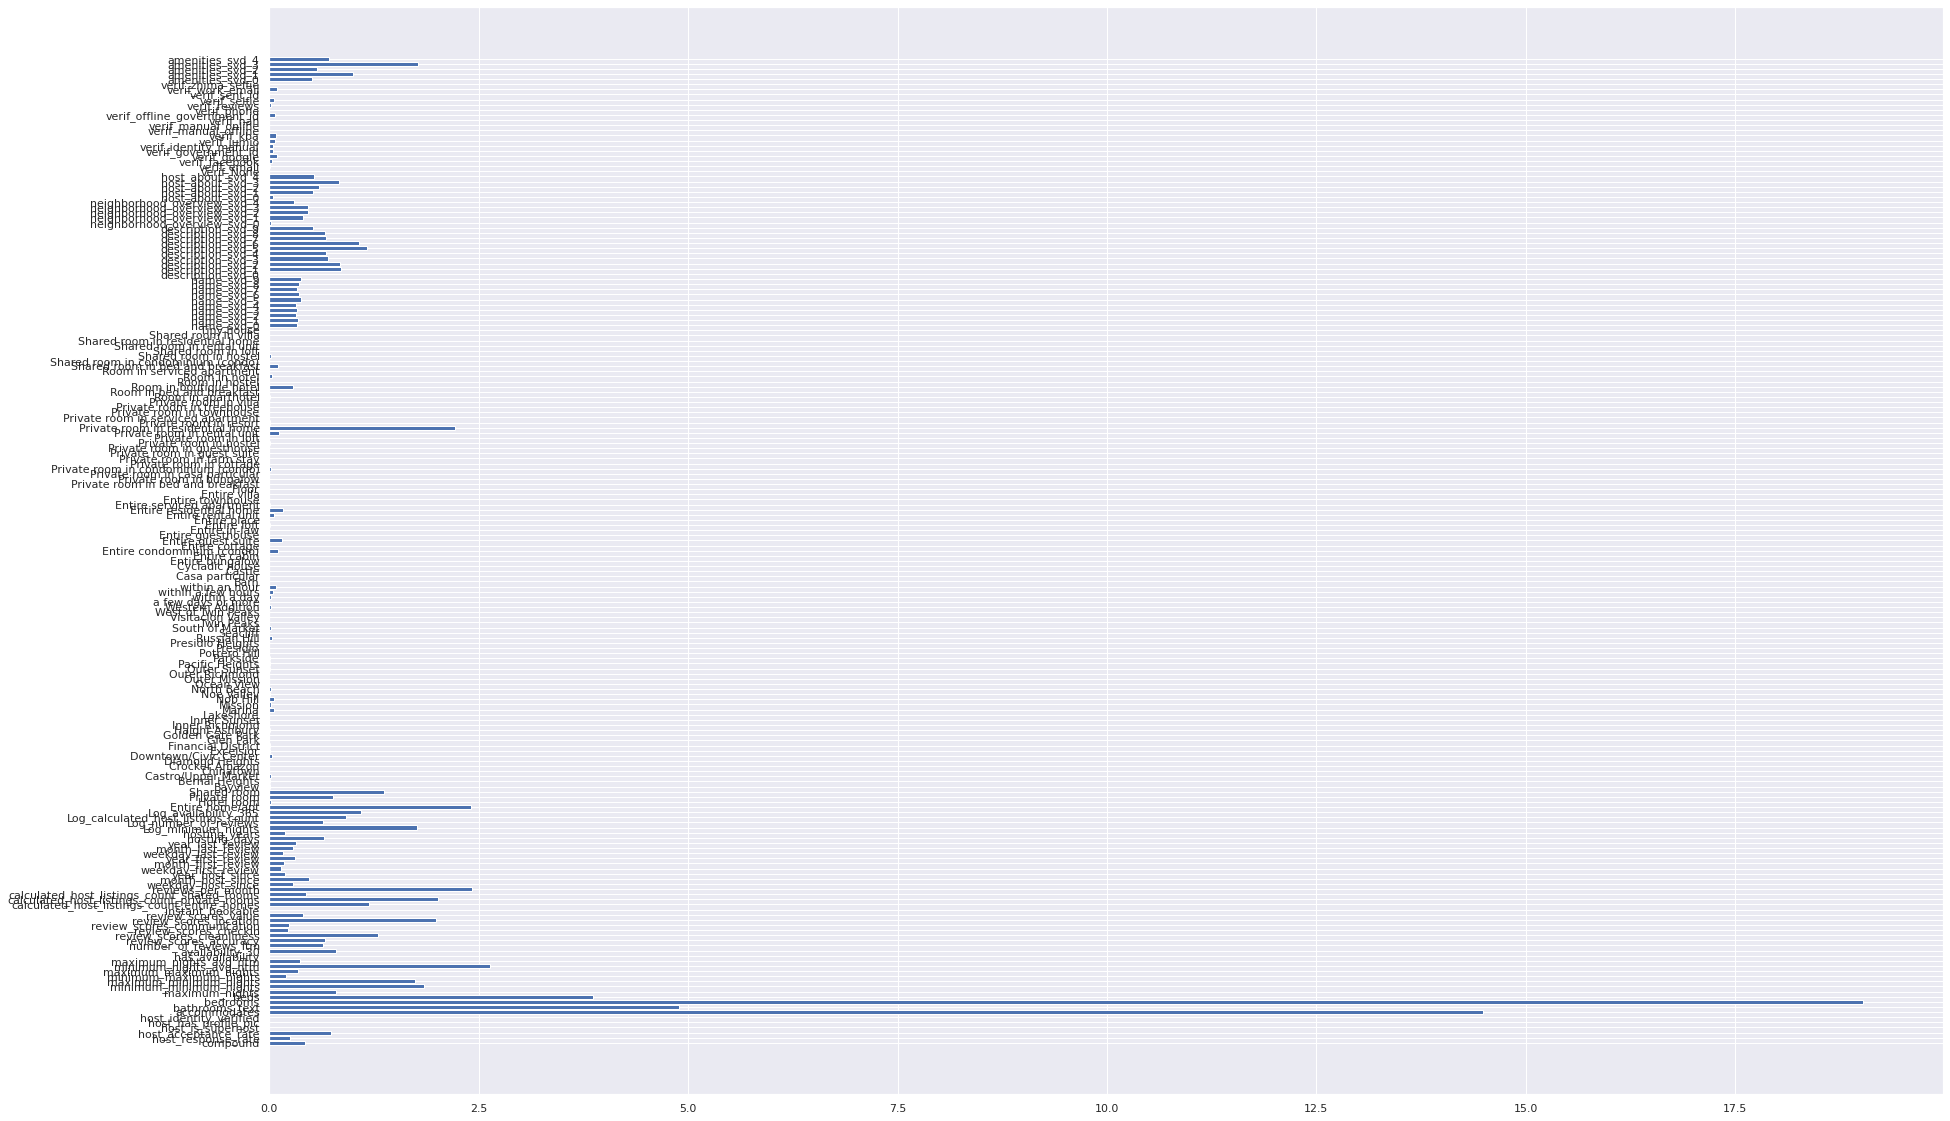

In [117]:
plt.figure(figsize=(30,20))
plt.barh(X_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

### Decision Tree Regression

In [118]:
grid_values = {'ccp_alpha': np.linspace(0, 0.002, 51)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=88)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=88),
             param_grid={'ccp_alpha': array([0.00e+00, 4.00e-05, 8.00e-05, 1.20e-04, 1.60e-04, 2.00e-04,
       2.40e-04, 2.80e-04, 3.20e-04, 3.60e-04, 4.00e-04, 4.40e-04,
       4.80e-04, 5.20e-04, 5.60e-04, 6.00e-04, 6.40e-04, 6.80e-04,
       7.20e-04, 7.60e-04, 8.00e-04, 8.40e-04, 8.80e-04, 9.20e-04,
       9.60e-04, 1.00e-03, 1.04e-03, 1.08e-03, 1.12e-03, 1.16e-03,
       1.20e-03, 1.24e-03, 1.28e-03, 1.32e-03, 1.36e-03, 1.40e-03,
       1.44e-03, 1.48e-03, 1.52e-03, 1.56e-03, 1.60e-03, 1.64e-03,
       1.68e-03, 1.72e-03, 1.76e-03, 1.80e-03, 1.84e-03, 1.88e-03,
       1.92e-03, 1.96e-03, 2.00e-03])},
             scoring='r2')

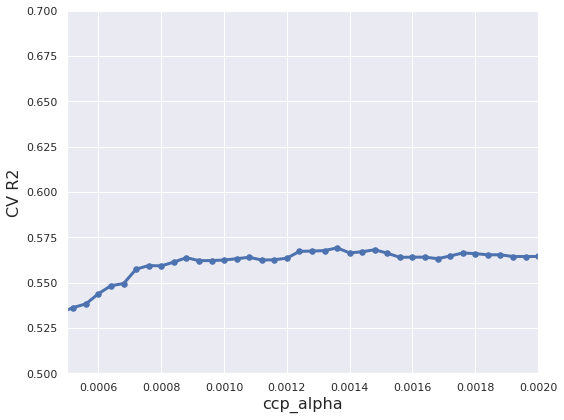

In [119]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(ccp_alpha, R2_scores, s=30)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0.0005, 0.0020])
plt.ylim([0.5, 0.7])

plt.tight_layout()
plt.show()

In [120]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.00136}


In [108]:
#Evaluation

print('CV R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_test, dtr_cv.predict(X_test)), 5))

CV R2: 0.56987
OSR2: 0.63047


Node count = 63


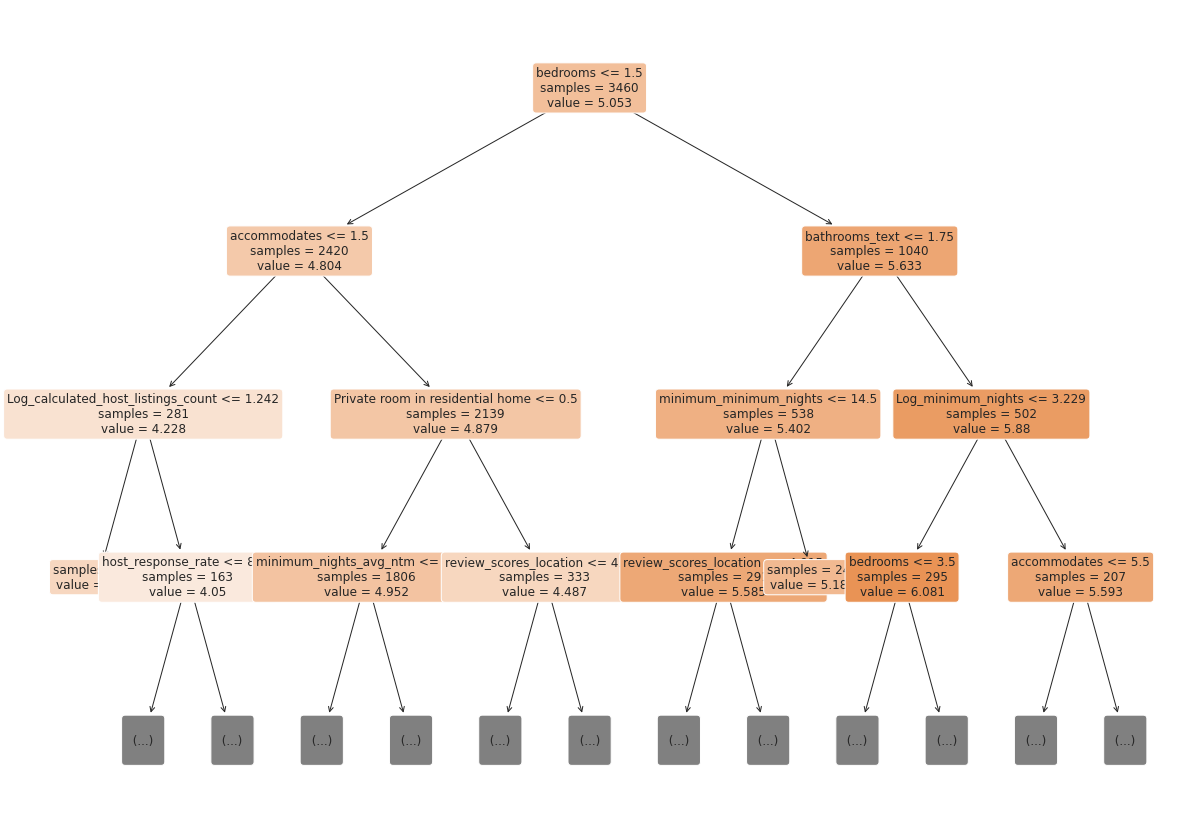

In [134]:
print('Node count =', dtr_cv.best_estimator_.tree_.node_count)

plt.figure(figsize=(20,15))
plot_tree(dtr_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'],
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=12,
         max_depth = 3)

plt.savefig(fname = 'decision_tree.png')
plt.show()

## Final Comparison

In [129]:
comparison_data = {'Linear Regression': ['{:.3f}'.format(r2_score(y_test, model_LR.predict(X_test_st_sc))),
                                         '{:.4f}'.format(RMSE(y_test, model_LR.predict(X_test_st_sc))),
                                         '{:.3f}'.format(MAE(y_test, model_LR.predict(X_test_st_sc)))],
                   'Ridge Regression': ['{:.3f}'.format(r2_score(y_test, rr_cv.predict(X_test_scaled))),
                                         '{:.4f}'.format(RMSE(y_test, rr_cv.predict(X_test_scaled))),
                                         '{:.3f}'.format(MAE(y_test, rr_cv.predict(X_test_scaled)))],
                   'Lasso Regression': ['{:.3f}'.format(r2_score(y_test, lasso_cv.predict(X_test_scaled))),
                                         '{:.4f}'.format(RMSE(y_test, lasso_cv.predict(X_test_scaled))),
                                         '{:.3f}'.format(MAE(y_test, lasso_cv.predict(X_test_scaled)))],
                   'Decision Tree Regressor': ['{:.3f}'.format(r2_score(y_test, dtr_cv.predict(X_test))),
                                               '{:.4f}'.format(RMSE(y_test, dtr_cv.predict(X_test))),
                                               '{:.3f}'.format(MAE(y_test, dtr_cv.predict(X_test)))],
                   'Random Forest': ['{:.3f}'.format(r2_score(y_test, rf_cv.predict(X_test))),
                                    '{:.4f}'.format(RMSE(y_test, rf_cv.predict(X_test))),
                                     '{:.3f}'.format(MAE(y_test, rf_cv.predict(X_test)))]}

comparison_table = pd.DataFrame(data=comparison_data, index=['OSR2', 'Out-of-sample MSE', 'Out-of-sample MAE'])
comparison_table.style.set_properties(**{'font-size': '14pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '12pt')]}])

,Linear Regression,Ridge Regression,Lasso Regression,Decision Tree Regressor,Random Forest
OSR2,0.721,0.709,0.716,0.640,0.743
Out-of-sample MSE,0.3636,0.3712,0.3670,0.4127,0.3489
Out-of-sample MAE,0.269,0.274,0.272,0.307,0.251
